# 3 线性神经网络

## 3.1 线性回归

[回归（regression）](2.ipynb)是能为一个或多个自变量与因变量之间关系建模的一类方法。

#### 线性回归的基本元素

- 线性模型：
    - 线性假设指目标可以表示为特征的加权和。$$\hat{y}=\textbf{w}^T\textbf{x}+b$$ $$\hat{\textbf{y}}=\textbf{Xw}+b$$ 
    **权重（weight）** 决定了每个特征对预测值的影响， **偏置（bias）** 指当所有特征都取值为0时，预测值应该为多少。
    - 线性模型本质即是权重 **w** 和偏置b确定的仿射变换。后面的softmax回归也是一个线性模型。



- 损失函数：
    - 回归函数中最常用的损失函数是平方误差函数，当样本 $i$ 的预测值为 $\hat{y}^{i}$ ，其相应的真实标签为 $y^{i}$ 时，平方误差定义为： $$l^{(i)}(\textbf{w},b)=\frac{1}{2}(\hat{y}^{(i)}-y^{(i)})^2$$ $$L(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})^2$$
    - 平方误差损失函数可以用于线性回归的一个原因是：我们假设了观测中包含噪声，其中噪声服从正态分布。这一部分参照《概率统计》课程的极大似然估计。



- 解析解：
    - 参照课程《面向人工智能的线性代数》中关于“最小二乘法”的描述，对于矛盾方程组 $A_{m \times n}x = b$ ，其最小二乘解 $\hat{x}$ 为对应正规化方程组 $A^T Ax=A^T b$ 的解。
    - 对于最小化损失函数即最小化 $||\textbf{y}-\textbf{Xw}||^2$ （此时已将偏置b合并到参数w中），若 $X$ 列满秩，则存在解析解：$$\textbf{w}^* = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T y$$

#### 随机梯度下降

参照课程《线性优化与凸优化》，对于需最小化的所选函数（在线性回归中是损失函数），在其负梯度方向上迭代地更新参数

1. 损失函数为 $$L(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})^2$$ 
2. 若按照整个数据集进行遍历速度缓慢，故在每次需要计算更新的时候只要随机抽取一小批样本，这种方法称为 **小批量随机梯度下降（minibatch stochastic gradient descent）** ：$$\mathcal{B}: \mathcal{B} \subseteq \{l^{(i)}|i=1,...,n\} $$
3. 对于小批量 $\mathcal{B}$ ，它的损失函数为： $$L_{\mathcal{B}}(\textbf{w},b)=\frac{1}{|\mathcal{B}|}\sum_{i \in \mathcal{B}}l^{(i)}(\textbf{w},b)$$
4. 损失函数对模型参数 $(\textbf{w},b)$ 求导：$$\nabla L_{\mathcal{B}}(\textbf{w},b) = \frac{1}{|\mathcal{B}|}\sum_{i\in \mathcal{B}}\partial_{(\textbf{w},b)}l^{(i)}(\textbf{w},b)$$
5. 设置步长为正数 $\eta$ ，则可以更新参数为 $$(\textbf{w},b) \leftarrow (\textbf{w},b)-\frac{\eta}{|\mathcal{B}|}\sum_{i\in \mathcal{B}}\partial_{(\textbf{w},b)}l^{(i)}(\textbf{w},b) $$

在其中：
- $|\mathcal{B}|$ 表示每个小批量的样本数，称为 **批量大小（batch size）**。
- $\eta$ 步长表示 **学习率（learning rate）**。
这些可以调整，但是不在训练过程中更新，而是手动预先指定的参数称为 **超参数（hyperparameter）** ， **调参（hyperparameter tuning）** 是选择超参数的过程。
- 超参数的调整是根据迭代结果来调整的，训练迭代结果是在独立的验证数据集上评估得到的。
- 找到一组能够在新增数据上实现较低的损失的参数称为 **泛化（generalization）**。

#### 矢量化加速

**矢量化加速** 是一种通过将操作应用于整个数组或数据集而不是逐个元素处理来大幅提升计算效率的技术。Numpy，Pandas，PyTorch等自动使用矢量化。

#### 神经网络

线性回归模型可看做一个单层神经网络：

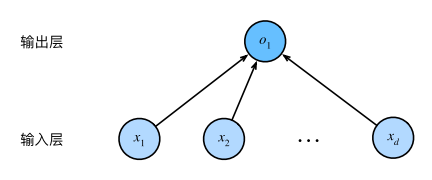

## 3.2 线性回归的实现

In [1]:
import random
import torch
from d2l import torch as d2l

- 数据集生成函数 ``synthetic_data(w, b, num_examples)``：
    - ``(w, b, num_examples)`` 是数据集准备好的权重、偏置和样本数量。
    - ``torch.normal(mean, std, size)`` 生成服从正态分布的均质mean、标准差std、形状size的张量。
    - ``torch.matmul(input, other)`` 执行矩阵乘法。
    - 最后一行的 ``torch.normal(0, 0.01, y.shape)`` 用于添加高斯噪声。

In [2]:
def synthetic_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

- 小批量生成函数 ``data_iter(batch_size, features, labels)``：
    - ``(batch_size, features, labels)`` 指定了生成小批量的大小，而后两个参数接收特征矩阵、标签向量作为输入。
    - ``len(features)`` 获取样本总数。
    - `indices = list(range(num_examples))` 生成索引列表，而 `random.shuffle(indices)` 对索引列表进行随机打乱。
    - ``for i in range(0, num_examples, batch_size)`` 循环遍历所有样本，但是每次只返回一个批次的数据。这是 ``yield`` 的惰性返回特性，它会暂停函数，保留局部变量和执行位置，返回当前值。

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

- 初始化模型参数：
    - `torch.normal()` 使用正态分布采样随机数来初始化权重
    - `requires_grad` 参数启用自动微分，参照 [第二章](2.ipynb)

In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

- 定义模型：

In [7]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

- 定义损失函数：

In [8]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

- 定义优化算法 `sgd(params, lr, batch_size)` ：
    - `(params, lr, batch_size)` 中 `lr` 是学习率， `params` 是所有需要更新的参数的列表。
    - `with torch.no_grad():` 因为我们需要更新参数，所以需要临时禁用梯度跟踪，保证求取梯度时针对的仅是新的参数
    - `param.grad.zero_()` 重置梯度，因为 **PyTorch 会累积梯度**


In [4]:
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

- 训练：
    - `.backward()` 的具体行为：从 `l.sum()` 出发，沿着计算图（由 `requires_grad=True` 的张量构建） 反向回溯所有参与计算的张量（如 w 和 b）。计算出的梯度会存储在参数的 `.grad` 属性中（如 `w.grad` 和 `b.grad`）。

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029822
epoch 2, loss 0.000103
epoch 3, loss 0.000050


- 训练结果评估：

In [10]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-9.5129e-05,  3.8147e-06], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


## 3.3 softmax回归

#### 分类问题与独热编码

在[第一章](1.ipynb)中介绍到，回归用来预测连续数值的问题，而分类用来预测离散数值的问题。

样本的“硬性”类别指其实际意义上所属的唯一类别，样本的“软性”类别指的是属于每个类别的概率。软类别的模型可以兼容解决硬类别的实际问题。

若分类问题的类别间有一些自然顺序，那么这个问题可以转变为回归问题。然而，一般的分类问题并不与类别之间的自然顺序有关，使用[第二章](2.ipynb)介绍到的 **独热编码（one‐hot encoding）** 可以表示每个类别：
- 独热编码是一个向量，分量个数等于类别数
- 类别对应的分量设置为1，其他所有分量设置为0



#### 分类问题的网络架构

为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出：

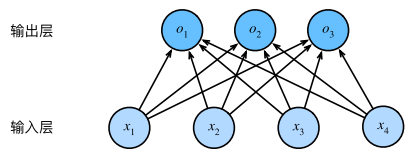

称每个输出取决于所有输入的层为全连接层。

每个输出形成向量 $\textbf{o}=(o_1,o_2,...,o_n)$ ，每个输出对应于它自己的仿射函数，向量形式表达后为： $$\textbf{o}=\textbf{Wx+b}$$ 

#### softmax运算

将为规范化的预测 $\textbf{o}$ 视为所求的软类别存在以下问题：
- 输出概率 $o_i(i=1,...,n)$ 的总和不一定为1，且部分值可能为负，违反概率公理。
- 对于分类器输出为 $o_i=p$ 的所有样本，样本中不一定有接近 $p$ 的部分实际上属于 $i$ 的类别。

***softmax*** 函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持可导的性质。它首先对每个未规范化的预测求幂，再让每个求幂后的结果除以它们的总和。

$$\textbf{O}=\textbf{XW+b}$$
$$\hat{\textbf{Y}}=\text{softmax}(\textbf{O})$$

#### 损失函数

参考《概率统计》课程关于最大似然估计的描述，对于任何标签 $\textbf{y}$ 和模型预测 $\hat{\textbf{y}}$ ，损失函数为： $$l(\textbf{y},\hat{\textbf{y}})=-\sum_{j=1}^q y_j \log \hat{y}_j$$

参考《信息论》课程，这个损失函数通常被称为 **交叉熵损失（cross-entropy loss）**。

## 3.4 softmax回归的实现

#### 数据集准备

导入所需的 PyTorch、torchvision 相关包，并设置 d2l 的显示方式为 SVG，以获得更清晰的图像展示。

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

通过 `transforms.ToTensor()` 将原始的 PIL 图像转换为 32 位浮点数格式的张量，并将像素值归一化到 [0, 1] 区间。随后分别下载训练集和测试集。

In [2]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

100.0%
100.0%
100.0%
100.0%


`len(mnist_train), len(mnist_test)` 分别输出训练集和测试集的样本数量，便于了解数据规模。

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

`mnist_train[0][0].shape` 用于查看单张图片的张量形状，Fashion-MNIST 每张图片为 28×28 像素。

In [4]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

`get_fashion_mnist_labels` 函数将数字标签转换为对应的文本标签，方便后续可视化时显示类别名称。

In [5]:
def get_fashion_mnist_labels(labels): #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

`show_images` 函数用于将多张图片以网格形式可视化，并可选地为每张图片添加标题。

In [6]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

这里从训练集中随机取出 18 张图片，并调用 `show_images` 进行可视化，同时显示其对应的类别标签。

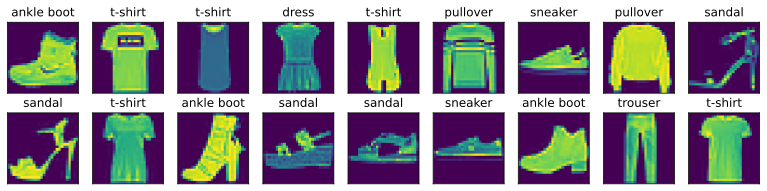

In [7]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

设置批量大小 `batch_size=256`，并定义 `get_dataloader_workers` 用于指定数据加载时的进程数。随后构建训练数据的 DataLoader，支持多进程加速数据读取。

In [8]:
batch_size = 256
def get_dataloader_workers(): #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())

In [9]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'7.23 sec'

使用 d2l 的计时器 `Timer` 测量遍历整个训练集所需的时间，评估数据加载效率。

In [11]:
def load_data_fashion_mnist(batch_size, resize=None): #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

`load_data_fashion_mnist` 封装了数据集的下载、预处理和 DataLoader 的创建，支持可选的图片缩放。

In [12]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


导入 IPython 的 display 以便后续可视化训练过程，d2l 用于辅助绘图和工具函数。

In [13]:
import torch
from IPython import display
from d2l import torch as d2l

重新设置批量大小，并通过 d2l 封装的 `load_data_fashion_mnist` 直接获取训练和测试集的 DataLoader。

In [14]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

定义输入和输出的维度，初始化权重 `W` 和偏置 `b`，并开启梯度计算。输入展平成 784 维，输出为 10 类。

In [15]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

演示张量在不同维度上的求和操作，便于理解 softmax 运算中的分母归一化。

In [16]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

`softmax` 函数实现 softmax 运算，将未归一化的输出变换为概率分布。先对每个元素取指数，再按行归一化。

In [17]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition # 这里应用了广播机制   

生成一个随机张量，演示 softmax 后每行的概率和为 1，说明 softmax 的归一化效果。

In [18]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0074, 0.0611, 0.3619, 0.0553, 0.5142],
         [0.5751, 0.2316, 0.1040, 0.0444, 0.0449]]),
 tensor([1., 1.]))

定义 softmax 回归模型 `net`，将输入展平后与权重相乘加偏置，再通过 softmax 得到每个类别的概率。

In [19]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

演示如何通过索引方式获取每个样本预测的正确类别概率，为后续交叉熵损失做准备。

In [20]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

`cross_entropy` 实现交叉熵损失函数，取预测概率的对数并取负号，衡量预测分布与真实分布的差异。

In [21]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

`accuracy` 函数用于计算预测正确的样本数，支持多类别分类。

In [22]:
def accuracy(y_hat, y): #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

计算预测准确率，即预测正确的样本数占总样本数的比例。

In [23]:
accuracy(y_hat, y) / len(y)

0.5

`Accumulator` 类用于在训练过程中累计多个变量（如损失和准确率），便于统计和可视化。

In [24]:
class Accumulator: #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

`evaluate_accuracy` 用于评估模型在指定数据集上的准确率，支持自定义和 PyTorch 内置模型。

In [25]:
def evaluate_accuracy(net, data_iter): #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

调用 `evaluate_accuracy` 评估当前模型在测试集上的准确率。

In [26]:
evaluate_accuracy(net, test_iter)

0.0405

`train_epoch_ch3` 实现单个训练周期的逻辑，包括前向传播、损失计算、反向传播和参数更新，并统计损失和准确率。

In [27]:
def train_epoch_ch3(net, train_iter, loss, updater): #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

`Animator` 类用于动态可视化训练过程中损失和准确率的变化曲线。

In [28]:
class Animator: #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear', yscale='linear',
                fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

`train_ch3` 封装完整的训练流程，包含多轮训练、测试集评估和动态可视化。

In [29]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

设置学习率，并定义 `updater` 函数用于参数更新，调用 d2l 封装的 sgd 优化器。

In [30]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

设置训练轮数，调用 `train_ch3` 开始训练 softmax 回归模型，并动态展示训练过程。

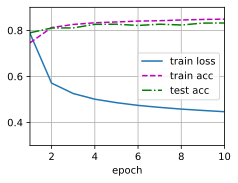

In [31]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

`predict_ch3` 用于对测试集样本进行预测，并可视化部分样本的真实标签与预测标签，直观展示模型效果。

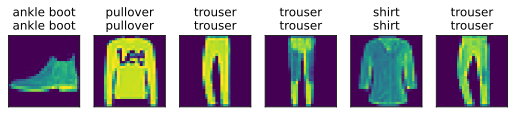

In [32]:
def predict_ch3(net, test_iter, n=6): #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)